In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
import pandas as pd 
import numpy as np

print('Your Pandas version is: %s' %pd.__version__)
print('*'*40)
print('Your NumPy version is %s' %np.__version__)

from sklearn.datasets import load_iris

iris = load_iris()
iris_nparray = iris.data
iris_dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_dataframe['group'] = pd.Series([iris.target_names[k]
                                     for k in iris.target], dtype="category")

Your Pandas version is: 2.0.3
****************************************
Your NumPy version is 1.25.1


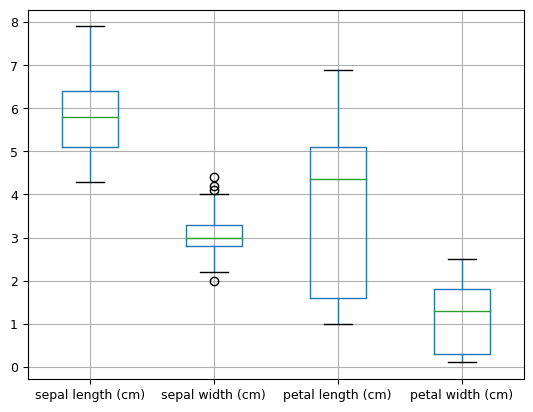

In [3]:
boxplots = iris_dataframe.boxplot(fontsize=9)

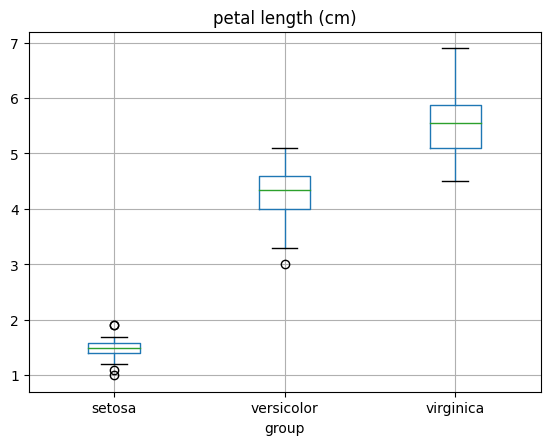

In [7]:
import matplotlib.pyplot as plt
boxplots = iris_dataframe.boxplot(column='petal length (cm)',
                                  by='group', fontsize=10)

plt.suptitle("")
plt.show()

In [8]:
from scipy.stats import ttest_ind

group0 = iris_dataframe['group'] == 'setosa'
group1 = iris_dataframe['group'] == 'versicolor'
group2 = iris_dataframe['group'] == 'virginica'
variable = iris_dataframe['petal length (cm)']

print('var1 %0.3f var2 %03f' % (variable[group1].var(), 
                                variable[group2].var()))



var1 0.221 var2 0.304588


In [11]:
variable = iris_dataframe['sepal width (cm)']
t, pvalue = ttest_ind(variable[group1], variable[group2],
                      axis = 0, equal_var=False)

print('t statistic %0.3f p-value %0.3f' % (t, pvalue))

t statistic -3.206 p-value 0.002


In [17]:
from scipy.stats import f_oneway
variable = iris_dataframe['sepal width (cm)']
f, pvalue = f_oneway(variable[group0],
                     variable[group1],
                     variable[group2])

print('One-way ANOVA F-value %0.3f p-value %0.3f' % (f,pvalue))

One-way ANOVA F-value 49.160 p-value 0.000


In [18]:
from pandas.plotting import parallel_coordinates

iris_dataframe['group'] = iris.target
iris_dataframe['labels'] = [iris.target_names[k]
                            for k in iris_dataframe['group']]

pll = parallel_coordinates(iris_dataframe, 'labels')

In [19]:
cols = iris_dataframe.columns[:4]
densityplot = iris_dataframe[cols].plot(kind='density')

In [20]:
variable = iris_dataframe['petal length (cm)']
single_distribution = variable.plot(kind='hist')

In [21]:
palette = {0: 'red', 1:'yellow', 2:'blue'}
colors = [palette[c] for c in iris_dataframe['group']]
simple_scatterplot = iris_dataframe.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', c=colors)

In [23]:
from pandas.plotting import scatter_matrix
palette = {0: 'red', 1:'yellow', 2:'blue'}
colors = [palette[c] for c in iris_dataframe['group']]
matrix_of_scatterplots = scatter_matrix(iris_dataframe,
                                        figsize=(6,6), color=colors, diagonal='kde')

In [33]:
iris_dataframe.cov()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),group
sepal length (cm),0.685694,-0.042434,1.274315,0.516271,0.530872
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639,-0.152349
petal length (cm),1.274315,-0.329656,3.116278,1.295609,1.372483
petal width (cm),0.516271,-0.121639,1.295609,0.581006,0.597315
group,0.530872,-0.152349,1.372483,0.597315,0.671141


In [34]:
iris_dataframe.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),group
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
group,0.782561,-0.426658,0.949035,0.956547,1.000000


In [36]:
covariance_matrix = np.cov(iris_nparray, rowvar=0)
correlation_matrix = np.corrcoef(iris_nparray, rowvar=0)

Um ótimo truque é elevar a correlação ao quadrado. Fazendo isso, o sial da relação é cancelado. O novo número informa a porcentagem da informação compartilhada pelas duas variáveis. Neste exemplo, uma correlação de 0,96 implica que 93% (0.962757**2) das informações são compartilhadas. A matriz de correlação quadrada é obtida por meio deste comando:

In [38]:
iris_dataframe.corr()**2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),group
sepal length (cm),1.000000,0.013823,0.759955,0.669028,0.612402
sepal width (cm),0.013823,1.000000,0.183561,0.134048,0.182037
petal length (cm),0.759955,0.183561,1.000000,0.927110,0.900667
petal width (cm),0.669028,0.134048,0.927110,1.000000,0.914983
group,0.612402,0.182037,0.900667,0.914983,1.000000


In [43]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

a = iris_dataframe['sepal length (cm)']
b = iris_dataframe['sepal width (cm)']
rho_coef, rho_p = spearmanr(a, b)
r_coef, r_p = pearsonr(a, b)
print(('Pearson r %0.3f | Spearman rho %0.3f') % (r_coef, rho_coef))



Pearson r -0.118 | Spearman rho -0.167
